In [1]:
using DataFrames
using Queryverse
using VegaLite
using VegaDatasets
using PrettyTables

# Histograms, Density Plots and Line Charts

In [2]:
# Bring in Cars data set
cars  = dataset("cars") |> 
@select(:Name, :Origin, :Miles_per_Gallon, :Cylinders, :Horsepower) |>
DataFrame

first(cars, 4) 

,Name,Origin,Miles_per_Gallon,Cylinders,Horsepower
,String,String,Float64⍰,Int64,Int64⍰
1,chevrolet chevelle malibu,USA,18.0,8,130
2,buick skylark 320,USA,15.0,8,165
3,plymouth satellite,USA,18.0,8,150
4,amc rebel sst,USA,16.0,8,150


## 1D Histogram

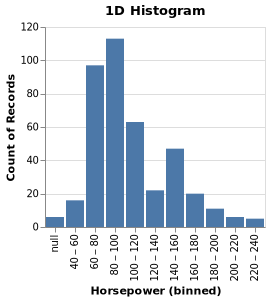

In [3]:
# Simple of 1D histogram of variable "Horsepower"

@vlplot(
  data = cars,
  mark = :bar,
  x = {"Horsepower:o", bin = true}, # Bins can be adjusted as : bin={maxbins=n}
  y = "count()",
  title = "1D Histogram"
)

## Density Plot

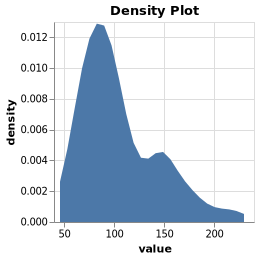

In [4]:
@vlplot(
  data = cars,
  mark = :area, # It's an area plot
  transform = [{density = "Horsepower"}], # For counts add in : counts = true
  x = {"value:q"},
  y = {"density:q"},  # Density variable created
  title = "Density Plot"
)

## Density Plot by Groups

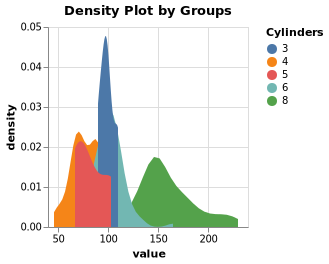

In [5]:
@vlplot(
  data = cars,
  mark = :area, # It's an area plot
  transform = [{density = "Horsepower", groupby = ["Cylinders"]}], # Add in groupby variable
  x = {"value:q"},
  y = {"density:q"},  # Density variable created
  color = "Cylinders:n",
  title = "Density Plot by Groups"
)

In [6]:
# Get Movie Data

movies = dataset("movies") |> 
@select(:Title, :IMDB_Rating, :Rotten_Tomatoes_Rating) |>  
@filter(!isna(_.IMDB_Rating) && !isna(_.Rotten_Tomatoes_Rating)) |>  # Filter for not null values
DataFrame;
first(movies,4)

,Title,IMDB_Rating,Rotten_Tomatoes_Rating
,Any,Float64⍰,Int64⍰
1,Slam,3.4,62
2,Pirates,5.8,25
3,Duel in the Sun,7.0,86
4,Tom Jones,7.0,81


## 2D Histogram Scatterplot

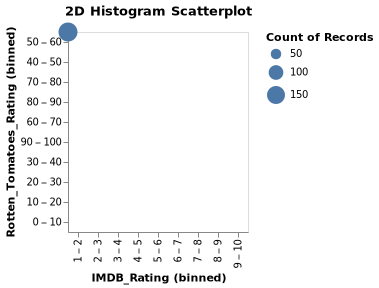

In [7]:
@vlplot(
  title = "2D Histogram Scatterplot",
  data = movies,
  mark = :circle, # The mark is a circle for scatterplot
  x = {"IMDB_Rating:o", bin = true}, # The x is binned, bin={maxbins=n} to control 
  y = {"Rotten_Tomatoes_Rating:o", bin = true, sort = "-x"}, # The y value is binned and ordered desending, bin={maxbins=n} to control
  size = "count()"

)

## 2D Histogram Heatmap

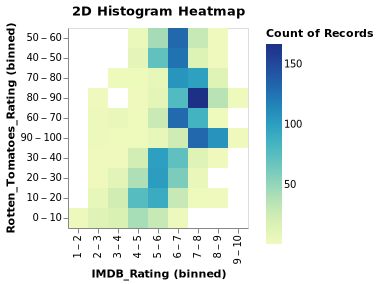

In [8]:
@vlplot(
  title = "2D Histogram Heatmap",
  data = movies,
  mark = :rect, # The mark is a circle for scatterplot
  x = {"IMDB_Rating:o", bin = true}, # The x is binned, bin={maxbins=n} to control 
  y = {"Rotten_Tomatoes_Rating:o", bin = true, sort = "-x"}, # The y value is binned and ordered desending, bin={maxbins=n} to control
  color = "count()"

)

In [9]:
# Preview of cars data

first(cars, 4)

,Name,Origin,Miles_per_Gallon,Cylinders,Horsepower
,String,String,Float64⍰,Int64,Int64⍰
1,chevrolet chevelle malibu,USA,18.0,8,130
2,buick skylark 320,USA,15.0,8,165
3,plymouth satellite,USA,18.0,8,150
4,amc rebel sst,USA,16.0,8,150


## Table Heatmap 1

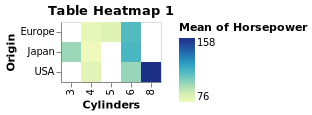

In [10]:
@vlplot(
  data = cars,
  mark = :rect,
  x = "Cylinders:n",
  y = "Origin:n",
  color = "mean(Horsepower)",
  title = "Table Heatmap 1"

)

In [11]:
# Seatle Weather Data
using Dates

seattle_temp = dataset("seattle-temps") |>
DataFrame;

first(seattle_temp, 4)


,date,temp
,String,Float64
1,2010-01-01T01:00:00-08:00,39.2
2,2010-01-01T02:00:00-08:00,39.0
3,2010-01-01T03:00:00-08:00,38.9
4,2010-01-01T04:00:00-08:00,38.8


## Table Heatmap 2

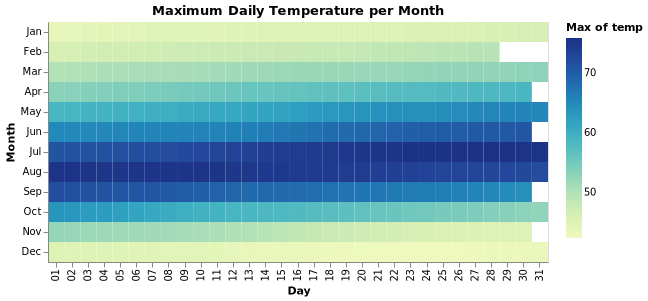

In [12]:
@vlplot(
  data = seattle_temp,
  mark = :rect,
  x = {"date(date):o", title = "Day"}, # o indicates an ordinal scale
  y = {"month(date):o", title = "Month"}, # o indicates an ordinal scale
  color = "max(temp):q",
  width = 500,
  title = "Maximum Daily Temperature per Month"

)

In [13]:
# Google Stock Data

google_stock= dataset("stocks") |>
@filter(_.symbol == "GOOG") |>
DataFrame;

first(google_stock, 4)

,symbol,date,price
,String,String,Float64
1,GOOG,Aug 1 2004,102.37
2,GOOG,Sep 1 2004,129.6
3,GOOG,Oct 1 2004,190.64
4,GOOG,Nov 1 2004,181.98


## Line Plot

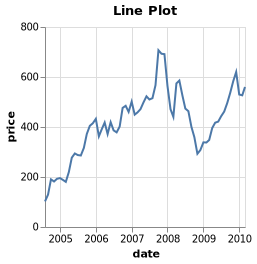

In [14]:
@vlplot(
  data = google_stock,
  mark = :line,
  x = "date:t",
  y = "price",
  title = "Line Plot"
)

## Step Chart

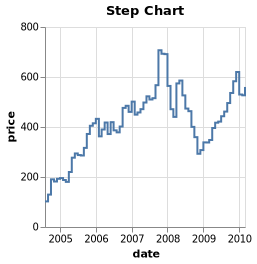

In [15]:
@vlplot(
  data = google_stock,
  mark = {:line, interpolate="step-after"}, # interpolate="step-after"
  x = "date:t",
  y = "price",
  title = "Step Chart"
)

## Line Chart with Monotone Interpolation

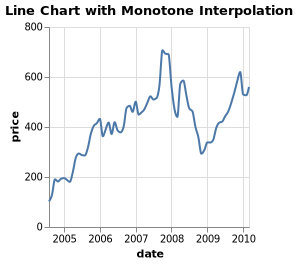

In [16]:
@vlplot(
  data = google_stock,
  mark = {:line, interpolate="monotone"}, # interpolate="step-after"
  x = "date:t",
  y = "price",
  title = "Line Chart with Monotone Interpolation"
)

## Line Chart with Point Markers

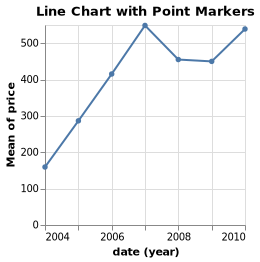

In [17]:
@vlplot(
  data = google_stock,
  mark = {:line, point = true}, # Here indicate point = true
  x = "year(date)",  # Function that maps each date into year
  y = "mean(price)", # The mean price over each year
  title = "Line Chart with Point Markers"
)

In [18]:
stocks = dataset("stocks") |> DataFrame;
first(stocks, 4)

,symbol,date,price
,String,String,Float64
1,MSFT,Jan 1 2000,39.81
2,MSFT,Feb 1 2000,36.35
3,MSFT,Mar 1 2000,43.22
4,MSFT,Apr 1 2000,28.37


## Line Chart by Class

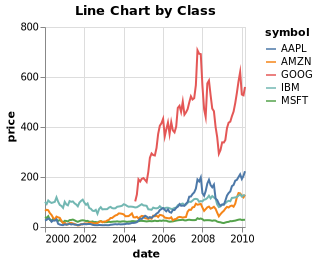

In [19]:
p1= 
@vlplot(
  data = stocks,
  mark = :line,
  x = "date:t",
  y = "price",
  title = "Line Chart by Class",
  color = "symbol:n"
)